
## Kort om att gå från R till Python

- Ni förväntas inte kunna skriva Python-kod, men ni kommer delvis känna igen arbetssättet från R


- Python är likt R ett populärt open source-språk inom data science, det är bra att få en inblick även i detta språk



- Vi kör koden i en "Jupyter Notebook", även det populärt inom Data Science. Notebooks stödjer både Python och R




#### Python
- "General-purpose" programmeringsspråk - data science bara ett applikationsområde
- Förlåtande för nybörjare, men därav mer risk för implicita fel, ex, "123" * 3
- Tacksamt att implementera, många data engineers kan python 
- TVINGAR dig att skriva prydligt, får felmeddelande utan korrekt indentering

- Python har betydligt sämre paket för klassisk statistik och regression jämfört med R, regression i populära Scikitlearn ger inte ens p-värden


#### R
- Fokuserat och mer utvecklat för Statistisk programmering
- Oförlåtande för nybörjare, mindre risk för implicita fel - exempelvis mean(x, na.rm=TRUE), beräkningar kan enbart göras på tillåtna datatyper
- bättre för visualiseringar med ggplot2
- Trevlig app och rapport-generering med knitr och Shiny




### Snabba exempel

- "<-" i R ersätts med "=" i Python 

(precis som i R är "==" det man använder som lika med-tecken

In [48]:
#Kör denna cell med "Shift + Enter"
siffra_python = 1+2 
print(siffra_python)

3


##### Förlåtande

- Python är förlåtande för nybörjare, men därav mer risk för implicita fel, ex, "123" * 3 fungerar, men är inte en matematisk operation

In [50]:
#Det går att multiplicera strängen "123" i python, men det är inte en matematisk operation
strang_ggr_num = "123"*3
print(strang_ggr_num)

123123123


##### Prydlighet

Nedan fungerar, det är korrekt med indenteringen efter både for och if-satsen

In [51]:
for i in [1,2]:
    print(i)
    if(i==2):
        print("Slut")

1
2
Slut


Nedan fungerar inte, vi får IndentationError då vi inte indenterat efter if-satsen

In [52]:
for i in [1,2]:
    print(i)
    if(i==2):
    print("Slut")

IndentationError: expected an indented block (<ipython-input-52-95df71d784a5>, line 4)

 .

 .

 .

 .

 .

 .

## Övning 1: Enkel logistisk modell

I denna övning testar vi att göra en enkel logistisk modell utifrån Iris-datasetet


##### Importera bibliotek

Vi importerar de python-bibliotek som vi behöver för att bearbeta vårt dataset

- numpy används för matrisberäkningar, extremt vanligt att använda tillsammans med pandas
- matplotlib för grafer

In [55]:
import numpy as np
import matplotlib.pyplot as plt


. 

# Hjälpfunktioner

- Används senare för att plotta modellutvärdering

In [56]:
def plot_training():
    
    print("accuracy, train: ", history.history['accuracy'][-1])
    print("accuracy, test: ", history.history['val_accuracy'][-1])
    
    # Credd : https://janakiev.com/notebooks/keras-iris/
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

 .

 .

 .

# Iris-data med 2 klasser 


##### Data import & preparering

 .

 Vi importerar vid bibliotek från sklearn, ett mycket populärt bibiliotek för typiska funktioner inom data science
 
 - load_iris för att hämta iris-data
 - train_test_split för att enkelt dela upp data i train och test
 - Onehotencoder för att skapa target-variaber som är dummies
 - StandardScaler för att senare normalisera input data

In [57]:
# Datapreparering är importerad från : https://janakiev.com/notebooks/keras-iris/
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#Bestämmer seed inför sampling
seed = 444
#Anger seed för tensorflow respektive numpy-beräkningar
tf.random.set_seed(seed)
np.random.seed(seed)


Vi hämtar iris-datasetet som vi arbetat med tidigare

- Vi har oberoende variablerna 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)' och 'petal width (cm)'
- Vi vill klassificera om blomman är versicolor(Y=1) eller inte (Y=0)

In [58]:
#Hämtar iris-data
iris = load_iris()
X = iris['data'][0:100] # Hämta endast 100 observationer
y = iris['target'][0:100]
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding (= skapar dummy-varibler)
enc = OneHotEncoder(categories='auto')
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Standardiserar data till medelvärde 0 och varians 1 
# Standardisering av värden hjälper neurala nätverk att konvergera
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


 Delar upp data i training och test

In [59]:
# Vi delar upp data test i train och test
X_train, X_test, Y_train_, Y_test_ = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

#Vi skapar variabler för antalet features och klasser, används till neurala nätverket
n_features = X.shape[1]
n_classes = Y.shape[1]

# Anpassa format för binär klassificering (1 target variabel)
Y_train = Y_train_[:,1].reshape(50,1)
Y_test = Y_test_[:,1].reshape(50,1)

print("n_features : " + str(n_features))
print("n_classes : " + str(n_classes))


print( "\n Standardiserade features: \n",feature_names,"\n",X_train[0:3])
print ("\nY (1=Versicolor)","\n", Y_train[0:3])


n_features : 4
n_classes : 2

 Standardiserade features: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 [[-0.894  0.002 -0.944 -1.22 ]
 [ 0.359 -0.418  0.928  0.914]
 [-0.581  0.842 -1.013 -0.864]]

Y (1=Versicolor) 
 [[0.]
 [1.]
 [0.]]


 .

# Logistisk regression (sigmoid aktivering)

Vi skapar nu en logistisk regression med ett neuralt nätverk:

- Vi använder "tensorflow" som "backend" till vårt neurala nätverk
- Paketet "keras" som numera finns i tensorflow används som "frontend"

- Vi skapar ett sekventiellt neuralt nätverk (funktionen "Sequential()" )

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.regularizers import L1L2
#from tensorflow.keras.optimizers import RMSprop

#Sekventiellt neuralt nätverk
logistic_regression_model = Sequential()


I vårt tomma sekventiella nätverk lägger vi till ett "Dense"/"fully connected" hidden layer:

1. Detta lager tar 4 dimensoner som input (våra oberoende variabler)

2. Ger 1 dimension output på mellan 0-1, efter sannolikhet att observationen är versicolor

In [61]:
logistic_regression_model.add(Dense(1, input_dim=n_features, activation='sigmoid'))



 I kompilering anger vi övriga val:
- Optimizer = sgd (stochastic gradient descent:    theta(t+1) = theta(t) - learning_rate * gradient)
- Loss-funktion = binary crossentropy, då vi har binär output-variabel
- Den metric vi optimerar för är accuracy

In [62]:
logistic_regression_model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])


Summering av vår skapade modell

In [63]:
logistic_regression_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


 .

# Träna modell

Vi tränar modellen i 500 epoker med funktion fit()

För varje epok ser vi hur loss och accuracy förändras på både vårt train och validation-dataset

In [64]:
# i "history" sparar vi träningshistoriken som används vid utvärdering av modellen
history = logistic_regression_model.fit(X_train,Y_train, epochs=500, validation_data=(X_test,Y_test))


Train on 50 samples, validate on 50 samples
Epoch 1/500
50/50 [==============================] - 1s 18ms/sample - loss: 1.0050 - accuracy: 0.0000e+00 - val_loss: 1.0103 - val_accuracy: 0.0000e+00
Epoch 2/500
50/50 [==============================] - 0s 588us/sample - loss: 0.9837 - accuracy: 0.0000e+00 - val_loss: 0.9882 - val_accuracy: 0.0000e+00
Epoch 3/500
50/50 [==============================] - 0s 523us/sample - loss: 0.9628 - accuracy: 0.0000e+00 - val_loss: 0.9667 - val_accuracy: 0.0200
Epoch 4/500
50/50 [==============================] - 0s 414us/sample - loss: 0.9424 - accuracy: 0.0200 - val_loss: 0.9457 - val_accuracy: 0.0400
Epoch 5/500
50/50 [==============================] - 0s 484us/sample - loss: 0.9225 - accuracy: 0.0200 - val_loss: 0.9254 - val_accuracy: 0.0400
Epoch 6/500
50/50 [==============================] - 0s 671us/sample - loss: 0.9032 - accuracy: 0.0600 - val_loss: 0.9055 - val_accuracy: 0.0400
Epoch 7/500
50/50 [==============================] - 0s 611us/sampl

Epoch 57/500
50/50 [==============================] - 0s 429us/sample - loss: 0.3894 - accuracy: 0.9800 - val_loss: 0.3772 - val_accuracy: 1.0000
Epoch 58/500
50/50 [==============================] - 0s 453us/sample - loss: 0.3846 - accuracy: 0.9800 - val_loss: 0.3722 - val_accuracy: 1.0000
Epoch 59/500
50/50 [==============================] - 0s 404us/sample - loss: 0.3798 - accuracy: 0.9800 - val_loss: 0.3674 - val_accuracy: 1.0000
Epoch 60/500
50/50 [==============================] - 0s 500us/sample - loss: 0.3752 - accuracy: 0.9800 - val_loss: 0.3626 - val_accuracy: 1.0000
Epoch 61/500
50/50 [==============================] - 0s 477us/sample - loss: 0.3707 - accuracy: 0.9800 - val_loss: 0.3580 - val_accuracy: 1.0000
Epoch 62/500
50/50 [==============================] - 0s 483us/sample - loss: 0.3663 - accuracy: 0.9800 - val_loss: 0.3535 - val_accuracy: 1.0000
Epoch 63/500
50/50 [==============================] - 0s 418us/sample - loss: 0.3621 - accuracy: 0.9800 - val_loss: 0.3491 -

50/50 [==============================] - 0s 334us/sample - loss: 0.2258 - accuracy: 1.0000 - val_loss: 0.2093 - val_accuracy: 1.0000
Epoch 114/500
50/50 [==============================] - 0s 510us/sample - loss: 0.2241 - accuracy: 1.0000 - val_loss: 0.2076 - val_accuracy: 1.0000
Epoch 115/500
50/50 [==============================] - 0s 431us/sample - loss: 0.2224 - accuracy: 1.0000 - val_loss: 0.2059 - val_accuracy: 1.0000
Epoch 116/500
50/50 [==============================] - 0s 584us/sample - loss: 0.2207 - accuracy: 1.0000 - val_loss: 0.2042 - val_accuracy: 1.0000
Epoch 117/500
50/50 [==============================] - 0s 407us/sample - loss: 0.2191 - accuracy: 1.0000 - val_loss: 0.2025 - val_accuracy: 1.0000
Epoch 118/500
50/50 [==============================] - 0s 516us/sample - loss: 0.2175 - accuracy: 1.0000 - val_loss: 0.2009 - val_accuracy: 1.0000
Epoch 119/500
50/50 [==============================] - 0s 591us/sample - loss: 0.2159 - accuracy: 1.0000 - val_loss: 0.1993 - val_ac

Epoch 169/500
50/50 [==============================] - 0s 369us/sample - loss: 0.1581 - accuracy: 1.0000 - val_loss: 0.1412 - val_accuracy: 1.0000
Epoch 170/500
50/50 [==============================] - 0s 593us/sample - loss: 0.1572 - accuracy: 1.0000 - val_loss: 0.1404 - val_accuracy: 1.0000
Epoch 171/500
50/50 [==============================] - 0s 265us/sample - loss: 0.1564 - accuracy: 1.0000 - val_loss: 0.1396 - val_accuracy: 1.0000
Epoch 172/500
50/50 [==============================] - 0s 444us/sample - loss: 0.1556 - accuracy: 1.0000 - val_loss: 0.1387 - val_accuracy: 1.0000
Epoch 173/500
50/50 [==============================] - 0s 479us/sample - loss: 0.1548 - accuracy: 1.0000 - val_loss: 0.1379 - val_accuracy: 1.0000
Epoch 174/500
50/50 [==============================] - 0s 484us/sample - loss: 0.1539 - accuracy: 1.0000 - val_loss: 0.1371 - val_accuracy: 1.0000
Epoch 175/500
50/50 [==============================] - 0s 430us/sample - loss: 0.1531 - accuracy: 1.0000 - val_loss: 0

Epoch 225/500
50/50 [==============================] - 0s 490us/sample - loss: 0.1215 - accuracy: 1.0000 - val_loss: 0.1052 - val_accuracy: 1.0000
Epoch 226/500
50/50 [==============================] - 0s 543us/sample - loss: 0.1210 - accuracy: 1.0000 - val_loss: 0.1047 - val_accuracy: 1.0000
Epoch 227/500
50/50 [==============================] - 0s 545us/sample - loss: 0.1205 - accuracy: 1.0000 - val_loss: 0.1042 - val_accuracy: 1.0000
Epoch 228/500
50/50 [==============================] - 0s 416us/sample - loss: 0.1200 - accuracy: 1.0000 - val_loss: 0.1037 - val_accuracy: 1.0000
Epoch 229/500
50/50 [==============================] - 0s 477us/sample - loss: 0.1195 - accuracy: 1.0000 - val_loss: 0.1033 - val_accuracy: 1.0000
Epoch 230/500
50/50 [==============================] - 0s 523us/sample - loss: 0.1190 - accuracy: 1.0000 - val_loss: 0.1028 - val_accuracy: 1.0000
Epoch 231/500
50/50 [==============================] - 0s 504us/sample - loss: 0.1186 - accuracy: 1.0000 - val_loss: 0

Epoch 281/500
50/50 [==============================] - 0s 475us/sample - loss: 0.0988 - accuracy: 1.0000 - val_loss: 0.0833 - val_accuracy: 1.0000
Epoch 282/500
50/50 [==============================] - 0s 532us/sample - loss: 0.0984 - accuracy: 1.0000 - val_loss: 0.0829 - val_accuracy: 1.0000
Epoch 283/500
50/50 [==============================] - 0s 554us/sample - loss: 0.0981 - accuracy: 1.0000 - val_loss: 0.0826 - val_accuracy: 1.0000
Epoch 284/500
50/50 [==============================] - 0s 425us/sample - loss: 0.0978 - accuracy: 1.0000 - val_loss: 0.0823 - val_accuracy: 1.0000
Epoch 285/500
50/50 [==============================] - 0s 488us/sample - loss: 0.0975 - accuracy: 1.0000 - val_loss: 0.0820 - val_accuracy: 1.0000
Epoch 286/500
50/50 [==============================] - 0s 390us/sample - loss: 0.0971 - accuracy: 1.0000 - val_loss: 0.0817 - val_accuracy: 1.0000
Epoch 287/500
50/50 [==============================] - 0s 474us/sample - loss: 0.0968 - accuracy: 1.0000 - val_loss: 0

Epoch 392/500
50/50 [==============================] - 0s 374us/sample - loss: 0.0724 - accuracy: 1.0000 - val_loss: 0.0584 - val_accuracy: 1.0000
Epoch 393/500
50/50 [==============================] - 0s 453us/sample - loss: 0.0722 - accuracy: 1.0000 - val_loss: 0.0583 - val_accuracy: 1.0000
Epoch 394/500
50/50 [==============================] - 0s 425us/sample - loss: 0.0720 - accuracy: 1.0000 - val_loss: 0.0581 - val_accuracy: 1.0000
Epoch 395/500
50/50 [==============================] - 0s 658us/sample - loss: 0.0718 - accuracy: 1.0000 - val_loss: 0.0580 - val_accuracy: 1.0000
Epoch 396/500
50/50 [==============================] - 0s 632us/sample - loss: 0.0717 - accuracy: 1.0000 - val_loss: 0.0578 - val_accuracy: 1.0000
Epoch 397/500
50/50 [==============================] - 0s 428us/sample - loss: 0.0715 - accuracy: 1.0000 - val_loss: 0.0576 - val_accuracy: 1.0000
Epoch 398/500
50/50 [==============================] - 0s 413us/sample - loss: 0.0713 - accuracy: 1.0000 - val_loss: 0

Epoch 448/500
50/50 [==============================] - 0s 445us/sample - loss: 0.0638 - accuracy: 1.0000 - val_loss: 0.0506 - val_accuracy: 1.0000
Epoch 449/500
50/50 [==============================] - 0s 417us/sample - loss: 0.0637 - accuracy: 1.0000 - val_loss: 0.0505 - val_accuracy: 1.0000
Epoch 450/500
50/50 [==============================] - 0s 531us/sample - loss: 0.0636 - accuracy: 1.0000 - val_loss: 0.0504 - val_accuracy: 1.0000
Epoch 451/500
50/50 [==============================] - 0s 394us/sample - loss: 0.0634 - accuracy: 1.0000 - val_loss: 0.0503 - val_accuracy: 1.0000
Epoch 452/500
50/50 [==============================] - 0s 544us/sample - loss: 0.0633 - accuracy: 1.0000 - val_loss: 0.0502 - val_accuracy: 1.0000
Epoch 453/500
50/50 [==============================] - 0s 425us/sample - loss: 0.0632 - accuracy: 1.0000 - val_loss: 0.0500 - val_accuracy: 1.0000
Epoch 454/500
50/50 [==============================] - 0s 390us/sample - loss: 0.0631 - accuracy: 1.0000 - val_loss: 0

##### Utvärdera modell
Vi utvärderar accuracy och loss i modellen:

- Vad ser vi för skillnader mellan train och test set?


accuracy, train:  1.0
accuracy, test:  1.0


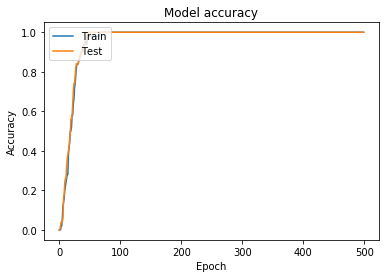

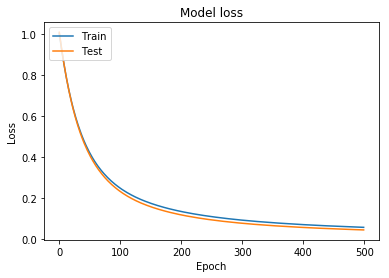

In [65]:
plot_training()

##### Prediktion och tolkning

Vi predicerar de 5 första observationerna från vårt test-data

In [66]:
np.set_printoptions(precision=3)

# Anger vilken kategori , tillbaka till 0 = 'setosa' 1 = 'versicolor', 2 = 'virginica'
category = logistic_regression_model.predict_classes(X_test[0:5])

probabilities = logistic_regression_model.predict_proba(X_test[0:5])


print("\nPredicerad kategori\n",category)

print("\nSannolikheter bakom prediktioner\n Versicolor = 1","\n",probabilities)

print("\nDen sanna kategorin\n",Y_test[0:5])


Predicerad kategori
 [[1]
 [0]
 [1]
 [0]
 [0]]

Sannolikheter bakom prediktioner
 Versicolor = 1 
 [[0.991]
 [0.054]
 [0.979]
 [0.032]
 [0.049]]

Den sanna kategorin
 [[1.]
 [0.]
 [1.]
 [0.]
 [0.]]


 .

 .

 .

 .

# Multinomialt problem - Iris med 3 klasser 

 Vi utökar övningen till identifiering av alla 3 klasser: 'setosa', 'versicolor' och 'virginica'
 
Vi förändrar input data:
- Istället för EN dummy-variabel (1=Versicolor) är vårt Y nu 3 dummy-variabler

# Data import & preparering

In [67]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding (= skapar dummy-varibler)
enc = OneHotEncoder(categories="auto")
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Standardiserar data till medelvärde 0 och varians 1 
# Standardisering av värden hjälper neurala nätverk att konvergera
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

print("n_features : " + str(n_features))
print("n_classes : " + str(n_classes))

print( "\n Standardiserade features: \n",feature_names,"\n",X_train[0:3])
print ("\nY: ",names,"\n", Y_train[0:3])

n_features : 4
n_classes : 3

 Standardiserade features: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 [[ 0.069 -0.132  0.251  0.396]
 [ 1.038  0.098  0.535  0.396]
 [ 2.25  -0.592  1.672  1.054]]

Y:  ['setosa' 'versicolor' 'virginica'] 
 [[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


 .

 .

 .

# Multinomial logistisk regression (Softmax)

Till skillnad från vårt binära problem kan vi inte använda "sigmoid" som aktiveringsfunktion
- Aktiveringsfunktionen "softmax" kan hantera problem där flera kategorier ska prediceras
- Vi måste byta ut vår loss-funktion när vi har flera klasser, från "binary_crossentropy" till "categorical_crossentropy"

In [68]:
multinomial_log_reg_model = Sequential()


# 3 klasser kräver 3 output neuroner, input_dim är fortfarande 4
multinomial_log_reg_model.add(Dense(n_classes, input_dim=n_features, activation='softmax')) #activation är förändrad

multinomial_log_reg_model.compile(optimizers='sgd',
             loss='categorical_crossentropy', #Loss-funktionen är förändrad
             metrics=['accuracy'])

multinomial_log_reg_model.summary()

history = multinomial_log_reg_model.fit(X_train,Y_train, epochs=500, validation_data=(X_test,Y_test))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Train on 75 samples, validate on 75 samples
Epoch 1/500
75/75 [==============================] - 1s 10ms/sample - loss: 1.0086 - accuracy: 0.6267 - val_loss: 1.0195 - val_accuracy: 0.6267
Epoch 2/500
75/75 [==============================] - 0s 355us/sample - loss: 0.9936 - accuracy: 0.6267 - val_loss: 1.0066 - val_accuracy: 0.6267
Epoch 3/500
75/75 [==============================] - 0s 365us/sample - loss: 0.9819 - accuracy: 0.6267 - val_loss: 0.9960 - val_accuracy: 0.6267
Epoch 4/500
75/75 [==============================] - 0s 236us/sample - loss: 0.9722 - accuracy: 0.6267 - val_loss: 0.9861 - val_accuracy: 0.6267
Epoch 5/500
75/75 [==========

Epoch 109/500
75/75 [==============================] - 0s 311us/sample - loss: 0.5184 - accuracy: 0.7600 - val_loss: 0.5122 - val_accuracy: 0.7467
Epoch 110/500
75/75 [==============================] - 0s 482us/sample - loss: 0.5162 - accuracy: 0.7600 - val_loss: 0.5098 - val_accuracy: 0.7333
Epoch 111/500
75/75 [==============================] - 0s 367us/sample - loss: 0.5138 - accuracy: 0.7600 - val_loss: 0.5075 - val_accuracy: 0.7333
Epoch 112/500
75/75 [==============================] - 0s 408us/sample - loss: 0.5118 - accuracy: 0.7600 - val_loss: 0.5056 - val_accuracy: 0.7333
Epoch 113/500
75/75 [==============================] - 0s 434us/sample - loss: 0.5099 - accuracy: 0.7600 - val_loss: 0.5033 - val_accuracy: 0.7333
Epoch 114/500
75/75 [==============================] - 0s 446us/sample - loss: 0.5077 - accuracy: 0.7733 - val_loss: 0.5011 - val_accuracy: 0.7333
Epoch 115/500
75/75 [==============================] - 0s 508us/sample - loss: 0.5055 - accuracy: 0.7733 - val_loss: 0

Epoch 165/500
75/75 [==============================] - 0s 471us/sample - loss: 0.4347 - accuracy: 0.8133 - val_loss: 0.4265 - val_accuracy: 0.8000
Epoch 166/500
75/75 [==============================] - 0s 387us/sample - loss: 0.4335 - accuracy: 0.8133 - val_loss: 0.4256 - val_accuracy: 0.8000
Epoch 167/500
75/75 [==============================] - 0s 418us/sample - loss: 0.4326 - accuracy: 0.8133 - val_loss: 0.4245 - val_accuracy: 0.8000
Epoch 168/500
75/75 [==============================] - 0s 308us/sample - loss: 0.4314 - accuracy: 0.8133 - val_loss: 0.4235 - val_accuracy: 0.8000
Epoch 169/500
75/75 [==============================] - 0s 366us/sample - loss: 0.4304 - accuracy: 0.8133 - val_loss: 0.4224 - val_accuracy: 0.8000
Epoch 170/500
75/75 [==============================] - 0s 292us/sample - loss: 0.4293 - accuracy: 0.8133 - val_loss: 0.4212 - val_accuracy: 0.8000
Epoch 171/500
75/75 [==============================] - 0s 345us/sample - loss: 0.4283 - accuracy: 0.8133 - val_loss: 0

Epoch 221/500
75/75 [==============================] - 0s 373us/sample - loss: 0.3865 - accuracy: 0.8133 - val_loss: 0.3819 - val_accuracy: 0.8267
Epoch 222/500
75/75 [==============================] - 0s 390us/sample - loss: 0.3859 - accuracy: 0.8133 - val_loss: 0.3813 - val_accuracy: 0.8267
Epoch 223/500
75/75 [==============================] - 0s 432us/sample - loss: 0.3851 - accuracy: 0.8133 - val_loss: 0.3805 - val_accuracy: 0.8267
Epoch 224/500
75/75 [==============================] - 0s 435us/sample - loss: 0.3845 - accuracy: 0.8133 - val_loss: 0.3800 - val_accuracy: 0.8267
Epoch 225/500
75/75 [==============================] - 0s 367us/sample - loss: 0.3838 - accuracy: 0.8133 - val_loss: 0.3794 - val_accuracy: 0.8267
Epoch 226/500
75/75 [==============================] - 0s 378us/sample - loss: 0.3831 - accuracy: 0.8133 - val_loss: 0.3789 - val_accuracy: 0.8267
Epoch 227/500
75/75 [==============================] - 0s 361us/sample - loss: 0.3825 - accuracy: 0.8133 - val_loss: 0

Epoch 277/500
75/75 [==============================] - 0s 436us/sample - loss: 0.3499 - accuracy: 0.8267 - val_loss: 0.3494 - val_accuracy: 0.8400
Epoch 278/500
75/75 [==============================] - 0s 429us/sample - loss: 0.3496 - accuracy: 0.8267 - val_loss: 0.3489 - val_accuracy: 0.8400
Epoch 279/500
75/75 [==============================] - 0s 393us/sample - loss: 0.3488 - accuracy: 0.8267 - val_loss: 0.3486 - val_accuracy: 0.8533
Epoch 280/500
75/75 [==============================] - 0s 300us/sample - loss: 0.3483 - accuracy: 0.8267 - val_loss: 0.3482 - val_accuracy: 0.8533
Epoch 281/500
75/75 [==============================] - 0s 367us/sample - loss: 0.3477 - accuracy: 0.8267 - val_loss: 0.3477 - val_accuracy: 0.8533
Epoch 282/500
75/75 [==============================] - 0s 320us/sample - loss: 0.3472 - accuracy: 0.8267 - val_loss: 0.3475 - val_accuracy: 0.8533
Epoch 283/500
75/75 [==============================] - 0s 342us/sample - loss: 0.3465 - accuracy: 0.8267 - val_loss: 0

Epoch 333/500
75/75 [==============================] - 0s 411us/sample - loss: 0.3208 - accuracy: 0.8533 - val_loss: 0.3231 - val_accuracy: 0.8800
Epoch 334/500
75/75 [==============================] - 0s 335us/sample - loss: 0.3203 - accuracy: 0.8533 - val_loss: 0.3228 - val_accuracy: 0.8800
Epoch 335/500
75/75 [==============================] - 0s 462us/sample - loss: 0.3197 - accuracy: 0.8533 - val_loss: 0.3222 - val_accuracy: 0.8800
Epoch 336/500
75/75 [==============================] - 0s 362us/sample - loss: 0.3191 - accuracy: 0.8533 - val_loss: 0.3218 - val_accuracy: 0.8800
Epoch 337/500
75/75 [==============================] - 0s 352us/sample - loss: 0.3186 - accuracy: 0.8533 - val_loss: 0.3210 - val_accuracy: 0.8800
Epoch 338/500
75/75 [==============================] - 0s 431us/sample - loss: 0.3180 - accuracy: 0.8533 - val_loss: 0.3205 - val_accuracy: 0.8800
Epoch 339/500
75/75 [==============================] - 0s 542us/sample - loss: 0.3175 - accuracy: 0.8533 - val_loss: 0

Epoch 389/500
75/75 [==============================] - 0s 334us/sample - loss: 0.2935 - accuracy: 0.8933 - val_loss: 0.2979 - val_accuracy: 0.8933
Epoch 390/500
75/75 [==============================] - 0s 401us/sample - loss: 0.2931 - accuracy: 0.8933 - val_loss: 0.2973 - val_accuracy: 0.8933
Epoch 391/500
75/75 [==============================] - 0s 408us/sample - loss: 0.2927 - accuracy: 0.8933 - val_loss: 0.2970 - val_accuracy: 0.8933
Epoch 392/500
75/75 [==============================] - 0s 441us/sample - loss: 0.2923 - accuracy: 0.8933 - val_loss: 0.2967 - val_accuracy: 0.8933
Epoch 393/500
75/75 [==============================] - 0s 412us/sample - loss: 0.2918 - accuracy: 0.8933 - val_loss: 0.2962 - val_accuracy: 0.8933
Epoch 394/500
75/75 [==============================] - ETA: 0s - loss: 0.2009 - accuracy: 0.93 - 0s 401us/sample - loss: 0.2915 - accuracy: 0.8933 - val_loss: 0.2960 - val_accuracy: 0.8933
Epoch 395/500
75/75 [==============================] - 0s 447us/sample - los

Epoch 500/500
75/75 [==============================] - 0s 529us/sample - loss: 0.2523 - accuracy: 0.9067 - val_loss: 0.2588 - val_accuracy: 0.9067


 
 ##### Utvärdering
 - Hur ser accuracy och loss ut för tränings- och valideringsdata?

accuracy, train:  0.9066667
accuracy, test:  0.9066667


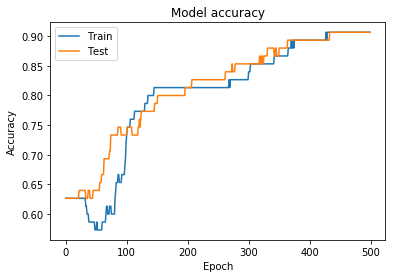

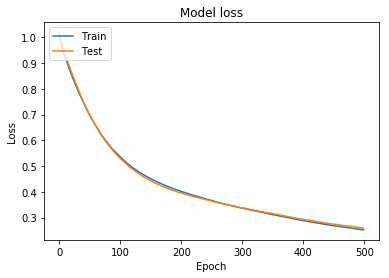

In [69]:
plot_training()

##### Prediktion och tolkning

Vi predicerar de 5 första observationerna från vårt test-data

In [70]:
np.set_printoptions(precision=3)

# Anger vilken kategori , tillbaka till 0 = 'setosa' 1 = 'versicolor', 2 = 'virginica'
category = multinomial_log_reg_model.predict_classes(X_test[0:5])

probabilities = multinomial_log_reg_model.predict_proba(X_test[0:5])


print("\nPredicerad kategori\n",category)

print("\nSannolikheter bakom prediktioner\n",names,"\n",probabilities)

print("\nDen sanna kategorin\n",Y_test[0:5])


Predicerad kategori
 [0 0 2 0 0]

Sannolikheter bakom prediktioner
 ['setosa' 'versicolor' 'virginica'] 
 [[9.987e-01 1.265e-03 2.613e-05]
 [9.905e-01 9.407e-03 9.295e-05]
 [4.073e-04 4.495e-01 5.501e-01]
 [9.702e-01 2.962e-02 2.095e-04]
 [9.975e-01 2.448e-03 4.536e-05]]

Den sanna kategorin
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


 .

 .

 .

# Neuralt nätverk

- Vi har nu utvärderat likheterna mellan ett neuralt nätverk och logistisk regression
- Neurala nätverks styrka är inte att replikera logistisk regression, utan att kunna hantera komplexare samband än en logistisk regression genom att introducera icke-linjaritet med hjälp av ett antal hidden layers, inte bara ett lager som vi använt ovan 


Skillnaden mot multinomial regression är att vi nu har flera lager (5) istället för 1: 
- Ett input lager som hanterar våra fyra features som input, har 5 noder och ReLU-aktivering
- 3 efterföljande hidden layers med 5 noder, ReLU-aktivering
- Det output lager som vi känner igen: softmax-aktivering som beräknar 3 värden, 0-1 hur sannolik observationen är var och en av våra 3 blomkategorier

In [71]:
# Skapar återigen ett tomt, sekventiellt nätverk
neural_network_model = Sequential()


nodes = 5 # Noder i hidden layer. TESTA ATT ÄNDRA ANTALET NODER

# Input lager, n_features=4
neural_network_model.add(Dense(nodes, input_dim=n_features, activation='relu'))

#Hidden lager
neural_network_model.add(Dense(nodes, activation='relu'))
neural_network_model.add(Dense(nodes, activation='relu'))
neural_network_model.add(Dense(nodes, activation='relu'))


#Output lager, n_classes=3
neural_network_model.add(Dense(n_classes, activation='softmax'))


neural_network_model.compile(optimizers='sgd',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

neural_network_model.summary()



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 18        
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


##### Träning av modell

In [72]:
history = neural_network_model.fit(X_train,Y_train, epochs=500, validation_data=(X_test,Y_test))


Train on 75 samples, validate on 75 samples
Epoch 1/500
75/75 [==============================] - 2s 20ms/sample - loss: 1.1969 - accuracy: 0.2933 - val_loss: 1.2276 - val_accuracy: 0.2400
Epoch 2/500
75/75 [==============================] - 0s 542us/sample - loss: 1.1764 - accuracy: 0.2667 - val_loss: 1.2118 - val_accuracy: 0.2133
Epoch 3/500
75/75 [==============================] - 0s 412us/sample - loss: 1.1640 - accuracy: 0.2667 - val_loss: 1.1974 - val_accuracy: 0.2000
Epoch 4/500
75/75 [==============================] - 0s 350us/sample - loss: 1.1544 - accuracy: 0.2533 - val_loss: 1.1862 - val_accuracy: 0.2000
Epoch 5/500
75/75 [==============================] - 0s 303us/sample - loss: 1.1465 - accuracy: 0.2400 - val_loss: 1.1790 - val_accuracy: 0.1867
Epoch 6/500
75/75 [==============================] - 0s 379us/sample - loss: 1.1404 - accuracy: 0.2533 - val_loss: 1.1707 - val_accuracy: 0.1600
Epoch 7/500
75/75 [==============================] - 0s 324us/sample - loss: 1.1341 - a

Epoch 57/500
75/75 [==============================] - 0s 357us/sample - loss: 0.9440 - accuracy: 0.6533 - val_loss: 0.9682 - val_accuracy: 0.6400
Epoch 58/500
75/75 [==============================] - 0s 451us/sample - loss: 0.9395 - accuracy: 0.6533 - val_loss: 0.9633 - val_accuracy: 0.6400
Epoch 59/500
75/75 [==============================] - 0s 359us/sample - loss: 0.9346 - accuracy: 0.6533 - val_loss: 0.9589 - val_accuracy: 0.6400
Epoch 60/500
75/75 [==============================] - 0s 424us/sample - loss: 0.9298 - accuracy: 0.6533 - val_loss: 0.9540 - val_accuracy: 0.6533
Epoch 61/500
75/75 [==============================] - 0s 310us/sample - loss: 0.9252 - accuracy: 0.6533 - val_loss: 0.9496 - val_accuracy: 0.6533
Epoch 62/500
75/75 [==============================] - 0s 339us/sample - loss: 0.9199 - accuracy: 0.6533 - val_loss: 0.9452 - val_accuracy: 0.6533
Epoch 63/500
75/75 [==============================] - 0s 462us/sample - loss: 0.9150 - accuracy: 0.6533 - val_loss: 0.9404 -

75/75 [==============================] - 0s 417us/sample - loss: 0.5924 - accuracy: 0.8267 - val_loss: 0.6110 - val_accuracy: 0.8133
Epoch 114/500
75/75 [==============================] - 0s 415us/sample - loss: 0.5846 - accuracy: 0.8267 - val_loss: 0.6035 - val_accuracy: 0.8133
Epoch 115/500
75/75 [==============================] - 0s 397us/sample - loss: 0.5774 - accuracy: 0.8267 - val_loss: 0.5947 - val_accuracy: 0.8133
Epoch 116/500
75/75 [==============================] - 0s 421us/sample - loss: 0.5699 - accuracy: 0.8133 - val_loss: 0.5851 - val_accuracy: 0.8267
Epoch 117/500
75/75 [==============================] - 0s 491us/sample - loss: 0.5627 - accuracy: 0.8267 - val_loss: 0.5798 - val_accuracy: 0.8267
Epoch 118/500
75/75 [==============================] - 0s 388us/sample - loss: 0.5555 - accuracy: 0.8133 - val_loss: 0.5711 - val_accuracy: 0.8267
Epoch 119/500
75/75 [==============================] - 0s 282us/sample - loss: 0.5483 - accuracy: 0.8267 - val_loss: 0.5606 - val_ac

Epoch 169/500
75/75 [==============================] - 0s 432us/sample - loss: 0.3287 - accuracy: 0.8400 - val_loss: 0.3727 - val_accuracy: 0.8533
Epoch 170/500
75/75 [==============================] - 0s 337us/sample - loss: 0.3269 - accuracy: 0.8400 - val_loss: 0.3699 - val_accuracy: 0.8533
Epoch 171/500
75/75 [==============================] - 0s 427us/sample - loss: 0.3255 - accuracy: 0.8400 - val_loss: 0.3747 - val_accuracy: 0.8533
Epoch 172/500
75/75 [==============================] - 0s 363us/sample - loss: 0.3244 - accuracy: 0.8400 - val_loss: 0.3731 - val_accuracy: 0.8533
Epoch 173/500
75/75 [==============================] - 0s 556us/sample - loss: 0.3230 - accuracy: 0.8400 - val_loss: 0.3764 - val_accuracy: 0.8400
Epoch 174/500
75/75 [==============================] - 0s 467us/sample - loss: 0.3214 - accuracy: 0.8400 - val_loss: 0.3796 - val_accuracy: 0.8400
Epoch 175/500
75/75 [==============================] - 0s 351us/sample - loss: 0.3204 - accuracy: 0.8400 - val_loss: 0

Epoch 225/500
75/75 [==============================] - 0s 351us/sample - loss: 0.2743 - accuracy: 0.8533 - val_loss: 0.4696 - val_accuracy: 0.8400
Epoch 226/500
75/75 [==============================] - 0s 507us/sample - loss: 0.2736 - accuracy: 0.8533 - val_loss: 0.4771 - val_accuracy: 0.8533
Epoch 227/500
75/75 [==============================] - 0s 402us/sample - loss: 0.2734 - accuracy: 0.8400 - val_loss: 0.4787 - val_accuracy: 0.8400
Epoch 228/500
75/75 [==============================] - 0s 407us/sample - loss: 0.2723 - accuracy: 0.8533 - val_loss: 0.4767 - val_accuracy: 0.8400
Epoch 229/500
75/75 [==============================] - 0s 407us/sample - loss: 0.2719 - accuracy: 0.8533 - val_loss: 0.4818 - val_accuracy: 0.8400
Epoch 230/500
75/75 [==============================] - 0s 420us/sample - loss: 0.2727 - accuracy: 0.8533 - val_loss: 0.4808 - val_accuracy: 0.8400
Epoch 231/500
75/75 [==============================] - 0s 365us/sample - loss: 0.2715 - accuracy: 0.8533 - val_loss: 0

Epoch 281/500
75/75 [==============================] - 0s 395us/sample - loss: 0.2403 - accuracy: 0.8533 - val_loss: 0.6180 - val_accuracy: 0.8667
Epoch 282/500
75/75 [==============================] - 0s 479us/sample - loss: 0.2399 - accuracy: 0.8667 - val_loss: 0.6273 - val_accuracy: 0.8533
Epoch 283/500
75/75 [==============================] - 0s 434us/sample - loss: 0.2389 - accuracy: 0.8533 - val_loss: 0.6234 - val_accuracy: 0.8667
Epoch 284/500
75/75 [==============================] - 0s 395us/sample - loss: 0.2391 - accuracy: 0.8533 - val_loss: 0.6234 - val_accuracy: 0.8667
Epoch 285/500
75/75 [==============================] - 0s 371us/sample - loss: 0.2387 - accuracy: 0.8667 - val_loss: 0.6264 - val_accuracy: 0.8667
Epoch 286/500
75/75 [==============================] - 0s 371us/sample - loss: 0.2369 - accuracy: 0.8667 - val_loss: 0.6285 - val_accuracy: 0.8667
Epoch 287/500
75/75 [==============================] - 0s 377us/sample - loss: 0.2401 - accuracy: 0.8667 - val_loss: 0

Epoch 337/500
75/75 [==============================] - 0s 388us/sample - loss: 0.2144 - accuracy: 0.8800 - val_loss: 0.7367 - val_accuracy: 0.8800
Epoch 338/500
75/75 [==============================] - 0s 337us/sample - loss: 0.2141 - accuracy: 0.8800 - val_loss: 0.7464 - val_accuracy: 0.8800
Epoch 339/500
75/75 [==============================] - 0s 362us/sample - loss: 0.2140 - accuracy: 0.8800 - val_loss: 0.7496 - val_accuracy: 0.8800
Epoch 340/500
75/75 [==============================] - 0s 459us/sample - loss: 0.2130 - accuracy: 0.8800 - val_loss: 0.7636 - val_accuracy: 0.8800
Epoch 341/500
75/75 [==============================] - 0s 324us/sample - loss: 0.2132 - accuracy: 0.8800 - val_loss: 0.7563 - val_accuracy: 0.8800
Epoch 342/500
75/75 [==============================] - 0s 373us/sample - loss: 0.2126 - accuracy: 0.8800 - val_loss: 0.7636 - val_accuracy: 0.8800
Epoch 343/500
75/75 [==============================] - 0s 438us/sample - loss: 0.2128 - accuracy: 0.8800 - val_loss: 0

Epoch 393/500
75/75 [==============================] - 0s 535us/sample - loss: 0.1873 - accuracy: 0.8933 - val_loss: 0.8444 - val_accuracy: 0.9067
Epoch 394/500
75/75 [==============================] - 0s 421us/sample - loss: 0.1870 - accuracy: 0.8933 - val_loss: 0.8578 - val_accuracy: 0.9067
Epoch 395/500
75/75 [==============================] - 0s 424us/sample - loss: 0.1871 - accuracy: 0.8933 - val_loss: 0.8476 - val_accuracy: 0.9067
Epoch 396/500
75/75 [==============================] - 0s 387us/sample - loss: 0.1865 - accuracy: 0.8933 - val_loss: 0.8495 - val_accuracy: 0.9067
Epoch 397/500
75/75 [==============================] - 0s 415us/sample - loss: 0.1861 - accuracy: 0.8933 - val_loss: 0.8551 - val_accuracy: 0.9067
Epoch 398/500
75/75 [==============================] - 0s 447us/sample - loss: 0.1855 - accuracy: 0.8933 - val_loss: 0.8469 - val_accuracy: 0.9067
Epoch 399/500
75/75 [==============================] - 0s 456us/sample - loss: 0.1847 - accuracy: 0.8933 - val_loss: 0

Epoch 449/500
75/75 [==============================] - 0s 356us/sample - loss: 0.1201 - accuracy: 0.9600 - val_loss: 0.9069 - val_accuracy: 0.9200
Epoch 450/500
75/75 [==============================] - 0s 399us/sample - loss: 0.1185 - accuracy: 0.9600 - val_loss: 0.9210 - val_accuracy: 0.9200
Epoch 451/500
75/75 [==============================] - 0s 512us/sample - loss: 0.1195 - accuracy: 0.9467 - val_loss: 0.9435 - val_accuracy: 0.9200
Epoch 452/500
75/75 [==============================] - 0s 448us/sample - loss: 0.1160 - accuracy: 0.9333 - val_loss: 0.9570 - val_accuracy: 0.9200
Epoch 453/500
75/75 [==============================] - 0s 411us/sample - loss: 0.1116 - accuracy: 0.9467 - val_loss: 0.9408 - val_accuracy: 0.9200
Epoch 454/500
75/75 [==============================] - 0s 442us/sample - loss: 0.1101 - accuracy: 0.9467 - val_loss: 0.9627 - val_accuracy: 0.9200
Epoch 455/500
75/75 [==============================] - 0s 491us/sample - loss: 0.1091 - accuracy: 0.9467 - val_loss: 0

 ##### Utvärdering
 - Hur ser accuracy och loss ut för tränings- och valideringsdata?
 - med 5 lager och 5 noder i varje lager utom output-lagret har vi 133 träningsbara parametrar. Är det rimligt givet 75 obs i träningsdata setet?
 - Övertränar nätverket på träningsdatat?
 - Vad händer om du förändrar antalet noder i vår modell, hur påverkar det accuracy för tränings och valideringsdata?

accuracy, train:  1.0
accuracy, test:  0.93333334


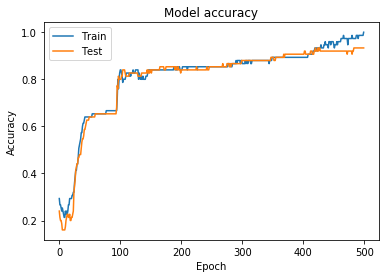

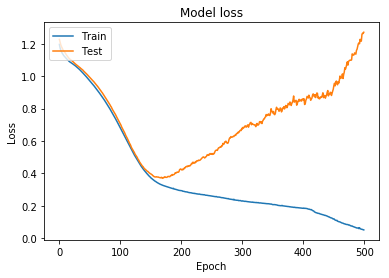

In [73]:
plot_training()


#### Prediktion och tolkning

Vi predicerar de 5 första observationerna från vårt test-data

In [74]:
np.set_printoptions(precision=3)

# Anger vilken kategori , tillbaka till 0 = 'setosa' 1 = 'versicolor', 2 = 'virginica'
category = neural_network_model.predict_classes(X_test[0:5])

probabilities = neural_network_model.predict_proba(X_test[0:5])


print("\nPredicerad kategori\n",category)

print("\nSannolikheter bakom prediktionerna\n",names,"\n",probabilities)

print("\nDen sanna kategorin\n",Y_test[0:5])


Predicerad kategori
 [0 0 2 0 0]

Sannolikheter bakom prediktionerna
 ['setosa' 'versicolor' 'virginica'] 
 [[1.000e+00 4.480e-19 3.169e-09]
 [1.000e+00 8.022e-18 1.220e-08]
 [5.663e-06 3.077e-01 6.923e-01]
 [1.000e+00 1.676e-16 3.796e-08]
 [1.000e+00 8.291e-18 1.184e-08]]

Den sanna kategorin
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


 .

. 

 .

# Neurala nätverk - Regularisering

Vi testar att köra vårat överdrivet stora neurala nätverk igen, denna gång med L1 och L2-regularisering
- Vi utvärderar om introduktion av L1 och L2-regularisering kan mitigera överträning på träningsdatat
- Testa gärna att förändra  antal_hidden_layer, antal_noder samt l1- / l2_reg_rate och utforska vad som händer

In [75]:
# Storlek på Neuralt Nätverk
antal_hidden_layer = 3 # Djup
antal_noder = 5 # Bredd per lager

#Regulariseringsparametrar
l1_reg_rate = 0.01
l2_reg_rate = 0.01

# Definiera forward propagation
neural_network_model = Sequential()

# Input lager 
neural_network_model.add(Dense(antal_noder, input_dim=4, activation='relu'))

#Hidden lager
for l in range(antal_hidden_layer):
    neural_network_model.add(Dense(antal_noder, activation='relu', kernel_regularizer=L1L2(l1=l1_reg_rate, l2=l2_reg_rate)))

#Output lager
neural_network_model.add(Dense(3, activation='softmax'))


neural_network_model.compile(optimizers='sgd',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

neural_network_model.summary()

history = neural_network_model.fit(X_train,Y_train, epochs=500, validation_data=(X_test,Y_test))


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_23 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 18        
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________
Train on 75 samples, validate on 75 samples
Epoch 1/500
75/75 [==============================] - 2s 24ms/sample - loss: 1.

Epoch 50/500
75/75 [==============================] - 0s 362us/sample - loss: 1.2125 - accuracy: 0.4400 - val_loss: 1.2218 - val_accuracy: 0.4267
Epoch 51/500
75/75 [==============================] - 0s 351us/sample - loss: 1.2063 - accuracy: 0.4400 - val_loss: 1.2155 - val_accuracy: 0.4400
Epoch 52/500
75/75 [==============================] - 0s 416us/sample - loss: 1.1998 - accuracy: 0.4400 - val_loss: 1.2091 - val_accuracy: 0.4400
Epoch 53/500
75/75 [==============================] - 0s 423us/sample - loss: 1.1933 - accuracy: 0.4533 - val_loss: 1.2032 - val_accuracy: 0.4267
Epoch 54/500
75/75 [==============================] - 0s 357us/sample - loss: 1.1870 - accuracy: 0.4533 - val_loss: 1.1969 - val_accuracy: 0.4533
Epoch 55/500
75/75 [==============================] - 0s 380us/sample - loss: 1.1816 - accuracy: 0.4533 - val_loss: 1.1914 - val_accuracy: 0.4400
Epoch 56/500
75/75 [==============================] - 0s 295us/sample - loss: 1.1750 - accuracy: 0.4667 - val_loss: 1.1847 -

75/75 [==============================] - 0s 371us/sample - loss: 0.9327 - accuracy: 0.8267 - val_loss: 0.9356 - val_accuracy: 0.8800
Epoch 107/500
75/75 [==============================] - 0s 407us/sample - loss: 0.9287 - accuracy: 0.8267 - val_loss: 0.9310 - val_accuracy: 0.8667
Epoch 108/500
75/75 [==============================] - ETA: 0s - loss: 0.9229 - accuracy: 0.75 - 0s 445us/sample - loss: 0.9249 - accuracy: 0.8133 - val_loss: 0.9265 - val_accuracy: 0.8667
Epoch 109/500
75/75 [==============================] - 0s 399us/sample - loss: 0.9210 - accuracy: 0.8267 - val_loss: 0.9217 - val_accuracy: 0.8800
Epoch 110/500
75/75 [==============================] - 0s 427us/sample - loss: 0.9161 - accuracy: 0.8267 - val_loss: 0.9155 - val_accuracy: 0.8533
Epoch 111/500
75/75 [==============================] - 0s 448us/sample - loss: 0.9110 - accuracy: 0.8133 - val_loss: 0.9111 - val_accuracy: 0.8533
Epoch 112/500
75/75 [==============================] - 0s 443us/sample - loss: 0.9075 - ac

75/75 [==============================] - 0s 385us/sample - loss: 0.5092 - accuracy: 0.9067 - val_loss: 0.4884 - val_accuracy: 0.9467
Epoch 217/500
75/75 [==============================] - 0s 392us/sample - loss: 0.5084 - accuracy: 0.8933 - val_loss: 0.4898 - val_accuracy: 0.9467
Epoch 218/500
75/75 [==============================] - 0s 366us/sample - loss: 0.5052 - accuracy: 0.9067 - val_loss: 0.4925 - val_accuracy: 0.9067
Epoch 219/500
75/75 [==============================] - 0s 386us/sample - loss: 0.5029 - accuracy: 0.9067 - val_loss: 0.4872 - val_accuracy: 0.9467
Epoch 220/500
75/75 [==============================] - 0s 493us/sample - loss: 0.5016 - accuracy: 0.9067 - val_loss: 0.4905 - val_accuracy: 0.9067
Epoch 221/500
75/75 [==============================] - 0s 439us/sample - loss: 0.4992 - accuracy: 0.9200 - val_loss: 0.4883 - val_accuracy: 0.9067
Epoch 222/500
75/75 [==============================] - 0s 556us/sample - loss: 0.4985 - accuracy: 0.9200 - val_loss: 0.4867 - val_ac

Epoch 272/500
75/75 [==============================] - 0s 393us/sample - loss: 0.4075 - accuracy: 0.9867 - val_loss: 0.4471 - val_accuracy: 0.9200
Epoch 273/500
75/75 [==============================] - 0s 299us/sample - loss: 0.4089 - accuracy: 0.9867 - val_loss: 0.4488 - val_accuracy: 0.9200
Epoch 274/500
75/75 [==============================] - 0s 434us/sample - loss: 0.4060 - accuracy: 0.9733 - val_loss: 0.4524 - val_accuracy: 0.9200
Epoch 275/500
75/75 [==============================] - 0s 330us/sample - loss: 0.4043 - accuracy: 0.9600 - val_loss: 0.4404 - val_accuracy: 0.9333
Epoch 276/500
75/75 [==============================] - 0s 396us/sample - loss: 0.4014 - accuracy: 0.9867 - val_loss: 0.4411 - val_accuracy: 0.9200
Epoch 277/500
75/75 [==============================] - 0s 383us/sample - loss: 0.4013 - accuracy: 0.9867 - val_loss: 0.4347 - val_accuracy: 0.9333
Epoch 278/500
75/75 [==============================] - 0s 388us/sample - loss: 0.4012 - accuracy: 0.9600 - val_loss: 0

Epoch 383/500
75/75 [==============================] - 0s 364us/sample - loss: 0.3113 - accuracy: 0.9733 - val_loss: 0.4135 - val_accuracy: 0.9333
Epoch 384/500
75/75 [==============================] - 0s 404us/sample - loss: 0.3099 - accuracy: 0.9733 - val_loss: 0.4252 - val_accuracy: 0.9333
Epoch 385/500
75/75 [==============================] - ETA: 0s - loss: 0.2982 - accuracy: 0.96 - 0s 397us/sample - loss: 0.3082 - accuracy: 0.9733 - val_loss: 0.4337 - val_accuracy: 0.9333
Epoch 386/500
75/75 [==============================] - 0s 232us/sample - loss: 0.3077 - accuracy: 1.0000 - val_loss: 0.4291 - val_accuracy: 0.9333
Epoch 387/500
75/75 [==============================] - 0s 318us/sample - loss: 0.3080 - accuracy: 1.0000 - val_loss: 0.4225 - val_accuracy: 0.9333
Epoch 388/500
75/75 [==============================] - 0s 351us/sample - loss: 0.3077 - accuracy: 0.9867 - val_loss: 0.4254 - val_accuracy: 0.9333
Epoch 389/500
75/75 [==============================] - 0s 381us/sample - los

Epoch 494/500
75/75 [==============================] - 0s 440us/sample - loss: 0.2700 - accuracy: 0.9867 - val_loss: 0.4116 - val_accuracy: 0.9333
Epoch 495/500
75/75 [==============================] - 0s 360us/sample - loss: 0.2702 - accuracy: 1.0000 - val_loss: 0.3941 - val_accuracy: 0.9333
Epoch 496/500
75/75 [==============================] - 0s 426us/sample - loss: 0.2687 - accuracy: 1.0000 - val_loss: 0.3952 - val_accuracy: 0.9333
Epoch 497/500
75/75 [==============================] - 0s 399us/sample - loss: 0.2686 - accuracy: 0.9867 - val_loss: 0.4088 - val_accuracy: 0.9333
Epoch 498/500
75/75 [==============================] - 0s 369us/sample - loss: 0.2681 - accuracy: 1.0000 - val_loss: 0.4053 - val_accuracy: 0.9333
Epoch 499/500
75/75 [==============================] - 0s 403us/sample - loss: 0.2681 - accuracy: 1.0000 - val_loss: 0.4129 - val_accuracy: 0.9333
Epoch 500/500
75/75 [==============================] - 0s 378us/sample - loss: 0.2681 - accuracy: 1.0000 - val_loss: 0

 #### Utvärdering
 - Hur ser accuracy och loss ut för tränings- och valideringsdata?
 - Löser regularisering vårt problem med överträning?

accuracy, train:  1.0
accuracy, test:  0.93333334


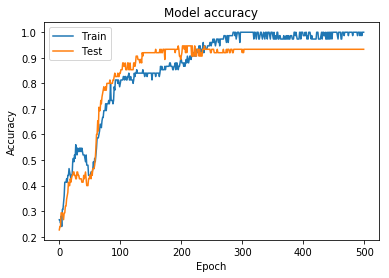

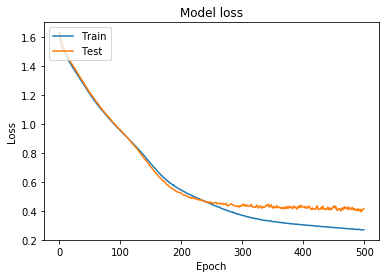

In [76]:
plot_training()

 .

 .

## Slutsats

- I denna övning har vi utforskat likheterna mellan neurala nätverk och logistisk regression


- Introducerat större neurala nätverk och de komplexa samband som kan hanteras mha icke-linjaritet


- Utforskat vad som händer om du bygger för stort neuralt nätverk relativt till träningsdata


- Redovisat att regularisering kan öka neurala nätverkets generaliserbarhet till test-datat

 . 

 .

 .

 . 

 . 

 .

 .